In [0]:
# Plotting data
# Comparing Results -- CS-FEM, FEM (ABAQUS) and Analytical Solution 
# for Regular Mesh  

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [0]:
df = pd.read_csv('displacement_Linear_Beam_U2.csv')
x_irr = np.array(df['x'])
y_csfem_irr = np.array(df['y_csfem_irr'])

In [0]:
# Dataset for Displacement (U2) Vs Length of Beam (@ y = 0)
  df = pd.read_csv('displacement_Beam_Regular_mesh.csv')
x = np.array(df['x'])
y_FEM = np.array(df['y_fem'])
y_CSFEM = np.array(df['y_csfem'])

In [0]:
# Analytical Solution 
def U_2(x,y): 
  P = 1000
  E = 3.0 * 10**7
  D = 12
  nu = 0.3
  L = 48 
  I = D**3/12
  A = 3*nu*y**2 * (L - x)
  B = (4 + 5*nu) * (D**2 * x) /4
  C = (3*L - x ) * x**2
  u_2 = ((-P)/(6*E*I))  * (A + B + C)
  return u_2



In [0]:
y_analytical = []
for i in range(len(x)):
  y = U_2(x[i],-6)
  y_analytical.append(y)
y_analytical = np.array(y_analytical)

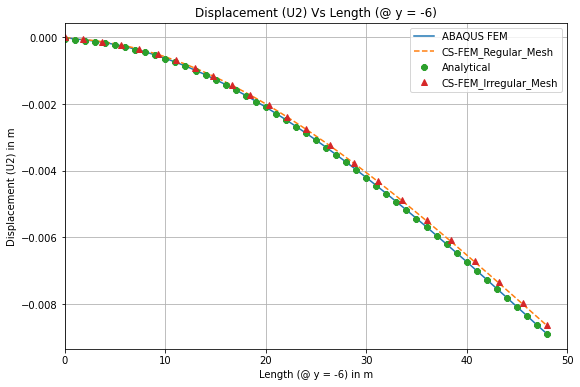

In [32]:
# Plotting data into one file 
plt.figure(figsize=(9,6))
plt.plot(x,y_FEM,'-' ,label = 'ABAQUS FEM')
plt.plot(x,y_CSFEM, '--',label = 'CS-FEM_Regular_Mesh')
plt.plot(x,y_analytical,'8', label= 'Analytical')
plt.plot(x_irr, y_csfem_irr, '^', label= 'CS-FEM_Irregular_Mesh')
plt.xlabel('Length (@ y = -6) in m')
plt.ylabel('Displacement (U2) in m')
plt.xlim(0,50)

plt.legend()
plt.grid()
plt.title('Displacement (U2) Vs Length (@ y = -6)')
plt.savefig('Disp_U2_Beam_Regular.png')
plt.show()


Calculation for Stress @ Middle C/S 

In [0]:
# Regular Mesh 
# df_2 = pd.read_csv('Stress_Sigma_11_at_x_24.csv')
y = np.linspace(-6,6,13,endpoint=True)
# Sigma_11_FEM = np.array(df_2['Sigma_11'])
Sigma_11_FEM = np.array([-954.815, -868.014, -694.411, -520.809, -347., -173, 0 , 173, 347, 520.809, 694.411, 868.014, 954.815])
Sigam_11_CSFEM = np.array([-951,-864.25, -691, -518.25, -345.25, -172.5, 0, 172.5, 345.25, 518.25, 691, 864.25, 951])


In [0]:
# Irregular Mesh
# Node No: 1, 105, 150, 188, 206, 173, 109, 6
# at x = apprx 24 m 
y_irr = np.array([-6, -4.27980947, -2.60430694, -0.954343438, 0.608225465, 2.31643438,  4.14756918, 6])
Sigma_11_CSFEM_Irr = np.array([-845.5, -534., -399.3, -169.536, 122.07, 443.13, 678.625, 832.35 ])

In [0]:
# Sigma_xx in analytical solution 
def sig_xx(x,y):
  P = 1000
  L = 48 
  D = 12
  I = D**3/12
  s_xx = (P*(L-x)*y)/I
  return s_xx

In [38]:
Sigma_analytical = []
for i in range(len(y)):
  s = sig_xx(24,y[i])
  Sigma_analytical.append(s)
print(Sigma_analytical)

[-1000.0, -833.3333333333334, -666.6666666666666, -500.0, -333.3333333333333, -166.66666666666666, 0.0, 166.66666666666666, 333.3333333333333, 500.0, 666.6666666666666, 833.3333333333334, 1000.0]


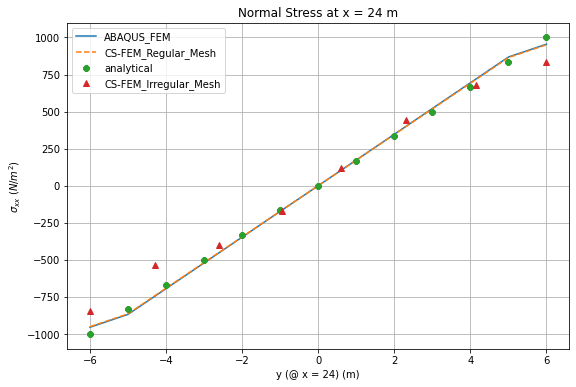

In [40]:
plt.figure(figsize= (9,6))
plt.plot(y,Sigma_11_FEM,'-',label='ABAQUS_FEM') 
plt.plot(y,Sigam_11_CSFEM, '--', label='CS-FEM_Regular_Mesh')
plt.plot(y,Sigma_analytical, '8', label='analytical')
plt.plot(y_irr, Sigma_11_CSFEM_Irr, '^', label= 'CS-FEM_Irregular_Mesh')
plt.xlabel('y (@ x = 24) (m)')
plt.ylabel('$\sigma_{xx}$ $(N/m^2)$')
plt.grid()
plt.title('Normal Stress at x = 24 m')
plt.legend()
plt.savefig('Sigma_xx_x_24m.png')
plt.show()
